In [54]:
import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [55]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [56]:
train_input.shape

(60000, 28, 28)

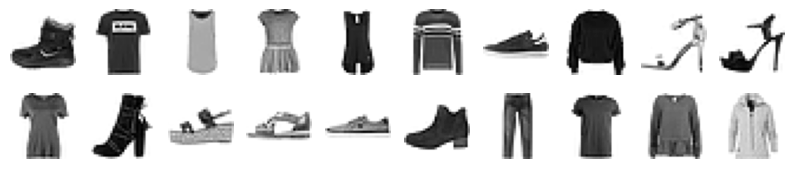

In [57]:
fig,axs = plt.subplots(2,10,figsize=(10,2))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i,j].axis('off')

In [58]:
# 표준화작업
# train_scaled = train_input/255
# 1차원행렬로 변경
# train_scaled = train_scaled.reshape(-1,28*28)

# 합성곱 신경망은 3차원 행렬이 되어야 함.
train_scaled = train_input.reshape(-1,28,28,1)/255

In [59]:
train_scaled.shape

(60000, 28, 28, 1)

In [60]:
# train세트 - train세트,검증세트,test세트

train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

1차 합성곱 층을 생성

In [61]:
# 1차 합성곱 신경망
model = keras.Sequential()
# padding='same', 'valid':패딩사용하지 않음.
# input_shape = (28,28,1) , 사이즈28x28 그레이색상 1, (28,28,3) - 사이즈 28x28,RGB색상 3개
model.add( keras.layers.Conv2D( 32,kernel_size=(3,3),activation='relu',padding='same',
          input_shape=(28,28,1) ) )
model.add(keras.layers.MaxPooling2D(2))

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2차 합성곱 층을 생성

In [62]:
# 2차 합성곱 신경망 생성
model.add( keras.layers.Conv2D( 64,kernel_size=(3,3),activation='relu',padding='same') )
model.add(keras.layers.MaxPooling2D(2))

In [63]:
model.add(keras.layers.Flatten()) # 1차원행렬
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))


In [64]:
model.summary()

# conv2d param사이즈 : kernel_size(3,3) x 깊이(1) x 필터(32개)+ 32개절편 - 3 x 3 x 1 x 32 + 32 = 320
# MaxPooling2D -> 사이즈가 절반으로 변경
# flatten : 1차원 행렬 14*14*32 = 6275

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# keras.utils.plot_model(model)

In [66]:
# keras.utils.plot_model(model,show_shapes=True, to_file='cnn_a.png',dpi=300)

In [67]:
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb]
                    )


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7388 - loss: 0.7210 - val_accuracy: 0.8811 - val_loss: 0.3284
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8692 - loss: 0.3616 - val_accuracy: 0.8962 - val_loss: 0.2759
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8881 - loss: 0.3047 - val_accuracy: 0.9039 - val_loss: 0.2591
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9019 - loss: 0.2704 - val_accuracy: 0.9087 - val_loss: 0.2539
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9084 - loss: 0.2457 - val_accuracy: 0.9106 - val_loss: 0.2402
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9165 - loss: 0.2190 - val_accuracy: 0.9189 - val_loss: 0.2272
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9265 - loss: 0.1981 - val_accuracy: 0.9187 - val_loss: 0.2280
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9302 - loss: 0

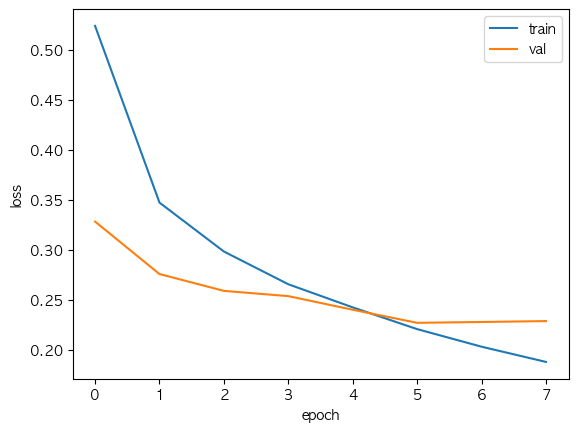

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [70]:
# stop위치 출력
early_stopping_cb.stopped_epoch

7

In [71]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9214 - loss: 0.2219


[0.22715237736701965, 0.918916642665863]

In [72]:
# val_scaled[0].reshape(28,28)

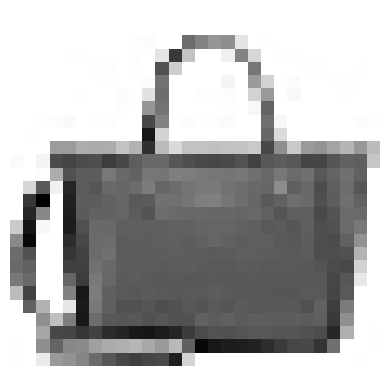

In [73]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

In [74]:
predict = model.predict(val_scaled[0:1]) # 3차원 행렬형태
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[5.3510624e-16 8.6718481e-26 2.7023686e-16 1.0511093e-16 1.2325191e-16
  2.0357437e-15 5.4263151e-17 4.8872921e-17 1.0000000e+00 3.1666148e-17]]


In [75]:
predict[0]

array([5.3510624e-16, 8.6718481e-26, 2.7023686e-16, 1.0511093e-16,
       1.2325191e-16, 2.0357437e-15, 5.4263151e-17, 4.8872921e-17,
       1.0000000e+00, 3.1666148e-17], dtype=float32)

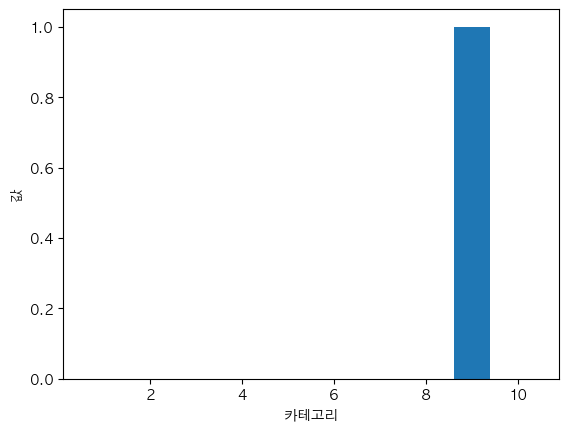

In [76]:
plt.bar(range(1,11),predict[0])
plt.xlabel('카테고리')
plt.ylabel('값')
plt.show()

In [77]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글부츠']

In [78]:
print(classes[np.argmax(predict)])  # np.argmax 최대값의 index값을 리턴

가방


In [79]:
# test세트 검증
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [80]:
# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9105 - loss: 0.2520


[0.2450571358203888, 0.9122999906539917]

In [81]:
# 딥러닝 훈련
# 데이터전처리 train_scaled = train_input.reshape(-1,28,28,1)/255

# 모델결정 model = keras.Sequential()
# 합성곱 신경망 (CNN)
# 1차 합성곱 신경망 
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
#                                input_shape=(28,28,1))
# 최대풀링 model.add(keras.layers.MaxPooling2D(2))
# 2차 합성곱 신경망
# model.add( keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same') )
# model.add(keras.layers.MaxPooling2D(2))

# 인공신경망 훈련
# Flatten 추가  model.add(keras.layers.Flatten())
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.4)) # 40%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# model.evaluate(test_scaled,test_target)